In [31]:
%matplotlib inline
#%matplotlib notebook
#%matplotlib widget
import matplotlib 
import numpy as np
import pandas as pd
import os, sys
#import ipywidgets
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d.art3d import Poly3DCollection    
 
# use LaTeX, choose nice some looking fonts and tweak some settings
matplotlib.rc('font', family='serif')
matplotlib.rc('font', size=16)
matplotlib.rc('legend', fontsize=16)
matplotlib.rc('legend', numpoints=1)
matplotlib.rc('legend', handlelength=1.5)
matplotlib.rc('legend', frameon=True)
matplotlib.rc('xtick.major', pad=7)
matplotlib.rc('xtick', direction="in")
matplotlib.rc('ytick', direction="in")
matplotlib.rc('xtick', top = True)
matplotlib.rc('ytick', right =True )
matplotlib.rc('xtick.minor', pad=7)
matplotlib.rc('text', usetex=True)
# matplotlib.rc('text.latex', 
#               preamble=[r'\usepackage[T1]{fontenc}',
#                         r'\usepackage{amsmath}',
#                         r'\usepackage{txfonts}',
#                         r'\usepackage{textcomp}'])

matplotlib.rc('figure', figsize=(12, 9))

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
device = torch.device('cuda:0')

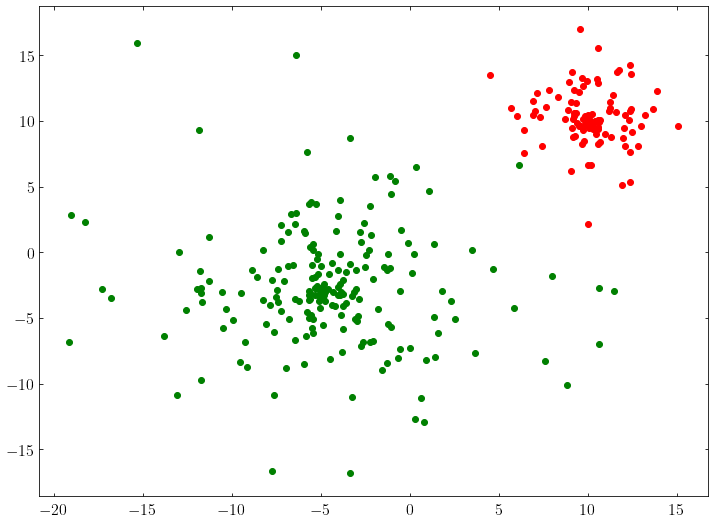

In [113]:
N1=1000
tN1=100
N2=2000
tN2=200
r1=np.random.normal(0, 3, N1)
theta1 = np.random.random(N1)*2.0*np.pi
x1=10.0+r1*np.cos(theta1)
y1=10.0+r1*np.sin(theta1)
label1=np.ones(x1.shape, dtype=np.int)


r2=np.random.normal(0, 7, N2)
theta2=np.random.random(N2)*2.0*np.pi
x2=-5.0+r2*np.cos(theta2)
y2=-3.0+r2*np.sin(theta2)
label2 = np.ones(x2.shape, dtype=np.int)*2

training_data = pd.DataFrame({"x":np.concatenate([x1[:tN1], x2[:tN2]]), 
                         "y":np.concatenate([y1[:tN1], y2[:tN2]]), 
                         "label":np.concatenate([label1[:tN1], label2[:tN2]])})
data = pd.DataFrame({"x":np.concatenate([x1[tN1:], x2[tN2:]]), 
                         "y":np.concatenate([y1[tN1:], y2[tN2:]]), 
                         "label":np.concatenate([label1[tN1:], label2[tN2:]]), 
                        "label1":np.zeros(N1+N2-tN1-tN2, dtype=np.int)})
    
def dist1(trainingdata, realdata, k=5):
    x = trainingdata["x"]-realdata["x"]
    y = trainingdata["y"]-realdata["y"]
    dist = np.sqrt(x**2+y**2)
    #print(trainingdata.iloc[:10])
    rr=dist.argsort()
    return (trainingdata["label"][rr])[:k]
    

d0 = training_data[training_data["label"]==1]
d1 = training_data[training_data["label"]==2]
plt.scatter(d0["x"], d0["y"], c="r")
plt.scatter(d1["x"], d1["y"], c="g")

In [142]:
def kNN(train, data, k=7):
    result = []
    for ind in data.index:
        
        cc = np.bincount(dist1(train, data.loc[ind, :], k))
        if cc[1] >= np.round((k+1)/2):
            result.append(1)
        elif cc[2] >= np.round((k+1)/2):
            result.append(2)
        else:
            print(cc)
            result.append(3)
    return result

rr = kNN(training_data, data)    
data["label1"]=np.array(rr)    
    

In [143]:
d1 = data[data["label1"]==1]
d2 = data[data["label1"]==2]
dd1 = data[(data["label"]==1) & (data["label1"]==2)]
dd2 = data[(data["label"]==2) & (data["label1"]==1)]

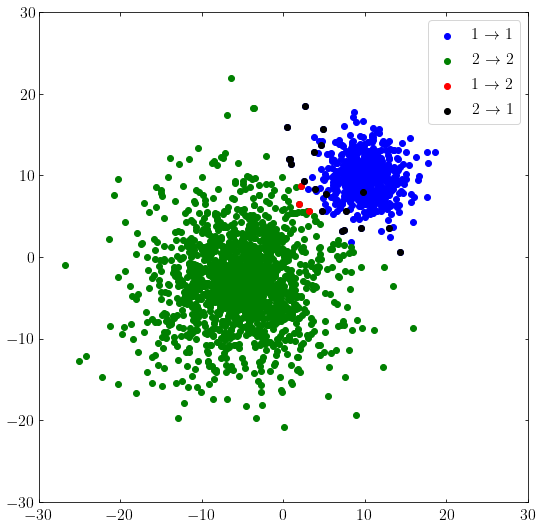

In [153]:
plt.scatter(d1["x"], d1["y"], c="b", label="1 $\\rightarrow$ 1")
plt.scatter(d2["x"], d2["y"], c="g", label="2 $\\rightarrow$ 2")
plt.scatter(dd1["x"], dd1["y"], c="r", label = "1 $\\rightarrow$ 2")
plt.scatter(dd2["x"], dd2["y"], c="k", label = "2 $\\rightarrow$ 1")

plt.xlim((-30, 30))
plt.ylim((-30, 30))

plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()

In [118]:
torch.randn(10, 100).shape

torch.Size([10, 100])

In [12]:
np.zeros(1).astype(np.int)

array([0])

In [16]:
np.concatenate([x1[:10], x2[:20]]).shape

(30,)

In [165]:
mat1=torch.rand((100, 100))+torch.diag(torch.rand(100)*50+30)

In [171]:
mat2=torch.inverse(mat1)

In [172]:
mat1.mm(mat2)

tensor([[ 1.0000e+00, -3.2596e-09, -3.7253e-09,  ..., -9.3132e-10,
          0.0000e+00, -3.7253e-09],
        [-9.3132e-10,  1.0000e+00, -1.8044e-09,  ..., -2.3283e-09,
          9.3132e-10,  1.8626e-09],
        [ 4.1910e-09,  7.4506e-09,  1.0000e+00,  ...,  9.3132e-10,
          0.0000e+00,  1.8626e-09],
        ...,
        [-1.8626e-09, -4.6566e-10, -2.2119e-09,  ...,  1.0000e+00,
         -3.4925e-10,  3.9581e-09],
        [ 4.4238e-09,  3.2596e-09, -3.7253e-09,  ...,  2.7940e-09,
          1.0000e+00,  3.7253e-09],
        [-1.1642e-09,  2.0955e-09, -7.4506e-09,  ..., -9.3132e-10,
         -2.3283e-10,  1.0000e+00]])

 

Support Vector Machine (SVM)
===

- 데이터가 $V=\mathbb{R}^n$ 공간에 표현되어 있다고 하자. SVM 은 데이터를 두개의 그룹 ($+,\,-$) 으로 분리하는 초평면 $\omega^T x+b=0$ 를 찾는 것이다. 벡터 $x\in V$ 에 대해 $\omega^T x +b>0$ 이면 $+$ 영역이라 하고 $\omega^Tx +b<0$ 이면 $-$ 영역 이라 하자. 만약 입력 벡터 $u$ 가 이 직선상에 있으면 $\omega^T u +b=0$ 이다.
- 두개의 그룹으로 분리하는 초평면을 찾되 이 직선식을 사이에 두고 이 두 그룹이 가능하면 멀리 떨어져 있도록 하는 초평면을 구한다.

## Margin $M$

- 두 그룹을 분리하는 초평면 $ \omega^Tx+b = 0$ 가 그룹 $+$ 의 영역으로 점차적으로 평행 이동 할 때, 처음 만나는 $+$ group data를 $x_{+}$ 이라 하자. 마찬가지로 $-$ 영역에서 처음 만나는 data를 $x_-$ 라 하자. 우리는 이 평면에 적당한 상수를 곱하거나 더해주어서 $\omega^T x_++b=1$, $\omega^T x_-+b=-1$ 이 되도록 할 수 있다. 

- $\omega^Tx_+ + b= c_1$, $\omega^T x_- + b=c_2$ 라 하자. $\omega' = \dfrac{2}{c_1-  c_2} \omega$, $b'= \dfrac{2}{c_1-c_2}b-\dfrac{c_1+c_2}{c_1-c_2}$ 라 하면 $\omega'^Tx_+ +b'=1$, $\omega'^T x_- +b'=-1$ 이 되며 $\omega'^T x+b'=0$ 은 역시 두 영역을 나누는 초평면이다. 


- 이렇게 되도록 $\omega' \rightarrow \omega$와 $b' \rightarrow b$를 설정하였다고 하자. 함수 $f(x) = \omega^T x+b$ 에 대해 $x$가 $+$ 영역이면 $f(x)\ge 1$ 이며, $x$ 가 $-$ 영역이면 $f(x) \le -1$ 이다.   
- 이 때 $w^Tx+b=1$ 과 $w^T x+b=-1$ 로 이루어지는 두 평면의 거리는 $\dfrac{2}{\|\omega\|}$ 이다.

## 최적화

-  이 두 평면 사이의 거리를 최대화 한다는 것은 $\|\omega\|$ 를 최소화 하는 것 혹은 $\dfrac{1}{2}\|\omega\|^2$ 를 최소화 하는 것과 같은 의미이다. $x_i$ 가 $+$ 그룹일 때 $y_i=+1$, $x_i$ 가 $-$ 그룹일 때 $y_i=-1$ 로 정의하면 $y_i (\omega^T x_i + b) \ge 1$ 이다. 여기서는 $\dfrac{1}{2}\|\omega\|^2$ 를 이용한다.

- 



## DBSCAN example

In [204]:
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.cluster import DBSCAN

In [205]:

def make_dbscan_sample1(N):
    r1=10.+np.random.normal(1, 1, N)
    th1=np.random.random(N)*np.pi
    x1, y1 = 5.0 + r1*np.cos(th1), r1*np.sin(th1)
    
    r2= 10.+np.random.normal(1, 1, N)
    th2=(np.random.random(N)+1)*np.pi
    x2, y2 = 15.0 + r2*np.cos(th2), r2*np.sin(th2)
    return x1, y1, x2, y2

In [206]:
x1, y1, x2, y2 = make_dbscan_sample1(1000)
z1, z2 = np.ones(1000, np.int), np.ones(1000, np.int)*2
XX= np.column_stack([np.concatenate([x1, x2]), np.concatenate([y1, y2])])

In [207]:
XX

array([[  4.75634783,  11.27864268],
       [  0.77228747,   8.06951121],
       [  6.72782052,  11.09857316],
       ...,
       [  8.4238874 ,  -6.5981824 ],
       [ 26.14829812,  -4.05356989],
       [ 15.20784941, -11.62819404]])

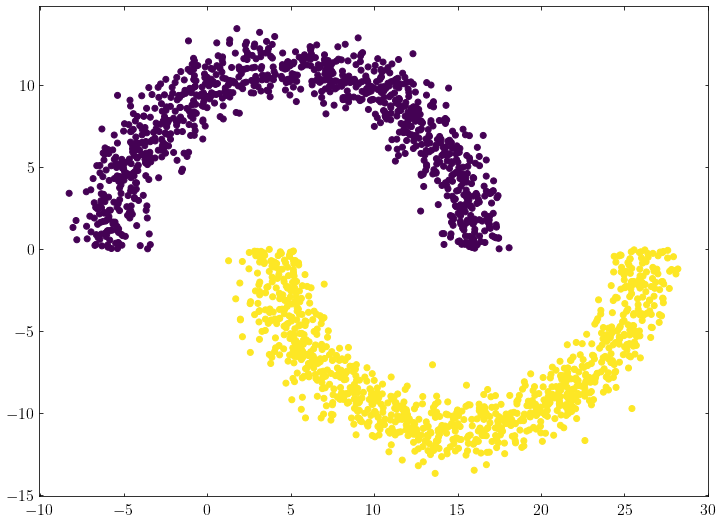

In [215]:
plt.scatter(XX[:,0], XX[:, 1], c=np.concatenate([z1,z2]))


In [213]:
dbscan = DBSCAN(min_samples=3, eps=2)
label = dbscan.fit_predict(XX)
display(label, np.bincount(label+1)) # 결과에서 -1 은 잡음샘플

array([0, 0, 0, ..., 1, 1, 1])

array([   0, 1000, 1000])

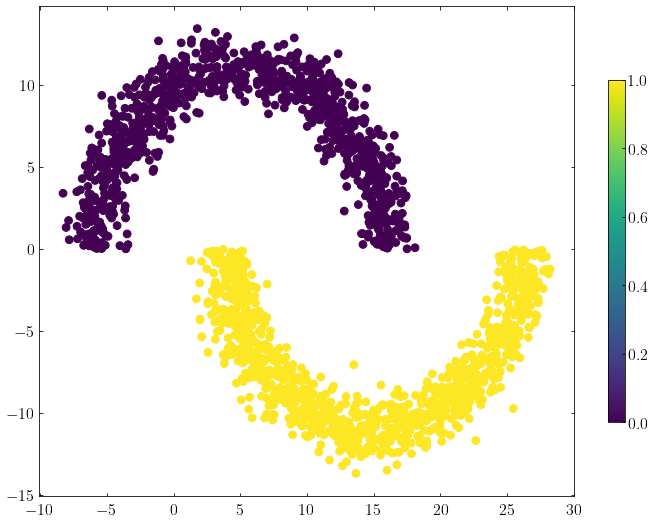

In [214]:
plt.scatter(XX[:,0], XX[:,1], c=label, s=60)
plt.colorbar(shrink=0.7)